In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# plt.rcParams['svg.fonttype'] = 'none'

In [2]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

In [3]:
def CalcPQFromUMICnts(raw_cnts):
    PQ_prop = []
    PQ_Ctrl_normed = []
    for i in range(len(raw_cnts)):
        PQ_prop.append([x / sum(raw_cnts[i]) for x in raw_cnts[i]])
        PQ_Ctrl_normed.append([x / (raw_cnts[i][7] + raw_cnts[i][8]) for x in raw_cnts[i]])

    PQ_prop_avg = []
    PQ_Ctrl_normed_avg = []
    for i in range(len(raw_cnts[0])):
        curr_col = [x[i] for x in PQ_prop]
        PQ_prop_avg.append(np.mean(curr_col))

        curr_norm_col = [x[i] for x in PQ_Ctrl_normed]
        PQ_Ctrl_normed_avg.append(np.mean(curr_norm_col))

    return PQ_prop, PQ_prop_avg, PQ_Ctrl_normed, PQ_Ctrl_normed_avg

In [4]:
# Numbers migrated from outputs of running PQSeq_Data_Analysis.py; see below for the annotation of samples
HeLa_PQ_raw = [
    [6774,8444,14419,5473,14604,32667,4284,3591,9978,9560,4231,1813],
    [8096,10636,17659,7025,18388,40623,5683,4780,12831,12761,5276,2661],
    [13703,14599,25174,10084,19614,63099,8355,7616,19412,49946,6361,4834],
    [10299,11408,19300,8751,16754,47609,7190,6230,15808,40230,6406,3898],
    [10734,13093,21876,9417,17651,62650,8389,8072,22871,38330,6849,6438],
    [5540,6541,12640,5356,10511,32476,4601,3594,11451,22461,3901,2662],
    [12874,15827,23952,10363,19012,58669,9781,7778,21143,65096,8207,5586],
    [9592,12282,22057,8860,15622,47198,7103,6191,16542,50211,6613,3871],
    [3880,5868,15639,7866,27433,36557,2823,3609,12212,1609,5451,979],
    [7969,10174,36887,11112,32602,65220,2695,5614,20711,3152,4362,2643],
    [3097,4007,12654,6547,23530,29860,2540,3110,10259,1509,4804,967],
    [6058,5857,20347,7930,24354,43715,2237,4351,14816,2909,3731,2098],
    [6937,8404,30207,14277,48644,61701,4612,6260,21336,2502,11450,1963],
    [4823,4749,20463,7127,19903,40420,1586,3321,13100,1918,3688,1424],
    [6906,8238,30750,14372,49160,60229,5776,7171,21017,3439,12776,1985],
    [7060,7675,31764,10840,33091,60545,2499,5160,20305,3101,5445,2279],
]

all_PQ_avg = []
all_PQ_ctrl_normed_avg = []
# for idx in range(int(len(S02316_PQ_raw) / 2)):
for idx in range(len(HeLa_PQ_raw)):
    curr_PQ_prop, curr_PQ_avg, curr_PQ_ctrl_normed, curr_PQ_ctrl_normed_avg = CalcPQFromUMICnts([HeLa_PQ_raw[idx]])
    all_PQ_avg.append(curr_PQ_avg)
    all_PQ_ctrl_normed_avg.append(curr_PQ_ctrl_normed_avg)

In [5]:
color_thres_num = 70
colors1 = plt.cm.Greys(np.linspace(0, 0.6, color_thres_num))
colors2 = plt.cm.Greys(np.linspace(0.6, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

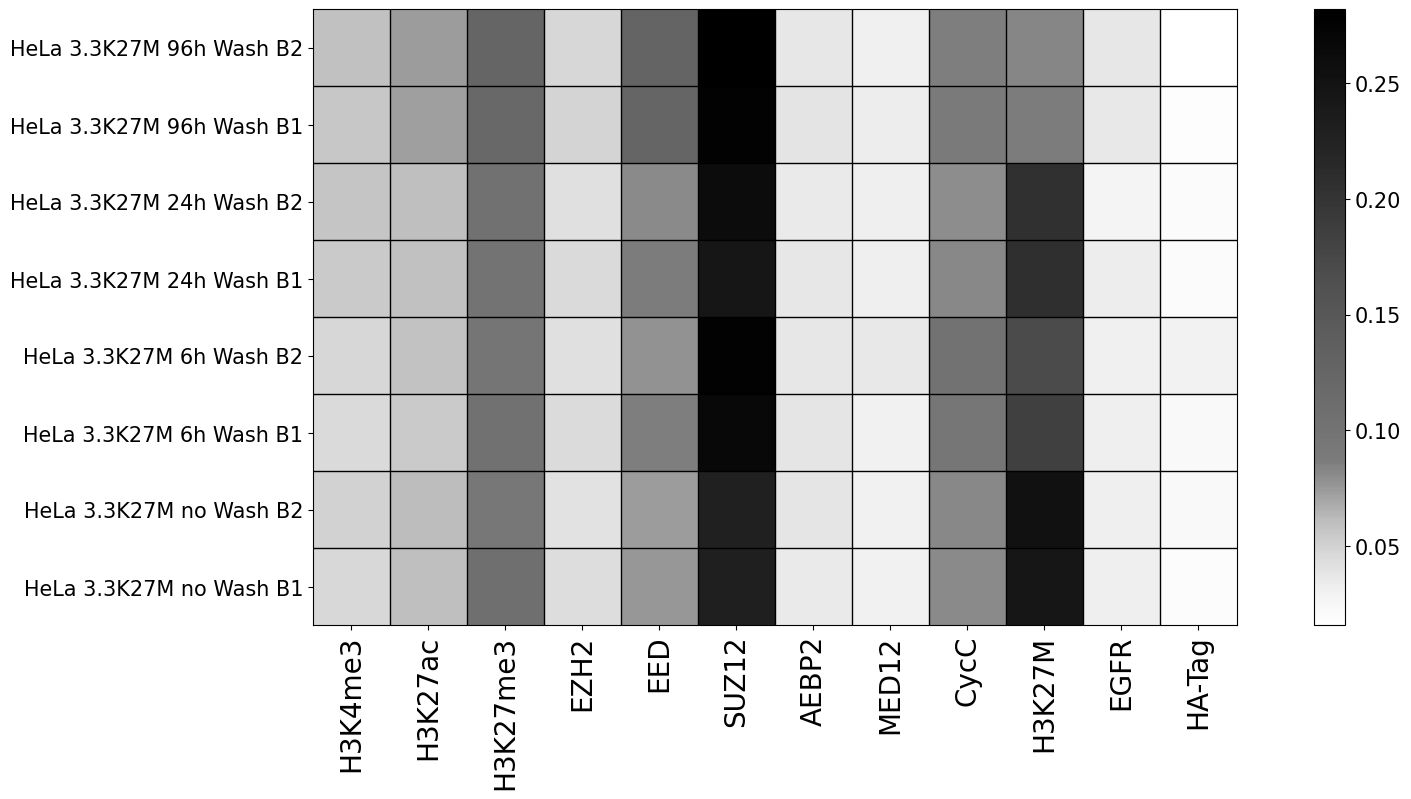

In [6]:
# Multiple plots together as one figure; Prod263
plot_data = (all_PQ_avg)[0:8]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

y_labels = [
    "HeLa 3.3K27M 96h Wash B2",
    "HeLa 3.3K27M 96h Wash B1",
    "HeLa 3.3K27M 24h Wash B2",
    "HeLa 3.3K27M 24h Wash B1",
    "HeLa 3.3K27M 6h Wash B2",
    "HeLa 3.3K27M 6h Wash B1",
    "HeLa 3.3K27M no Wash B2",
    "HeLa 3.3K27M no Wash B1",
    "HeLa 3.1K27M 96h Wash B2",
    "HeLa 3.1K27M 96h Wash B1",
    "HeLa 3.1K27M 24h Wash B2",
    "HeLa 3.1K27M 24h Wash B1",
    "HeLa 3.1K27M 6h Wash B2",
    "HeLa 3.1K27M 6h Wash B1",
    "HeLa 3.1K27M no Wash B2",
    "HeLa 3.1K27M no Wash B1",
]

im = ax.imshow(plot_data, cmap = customized_cmap)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[0:8], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_HeLa_33_PQ_depthnorm.svg", dpi = 1200)

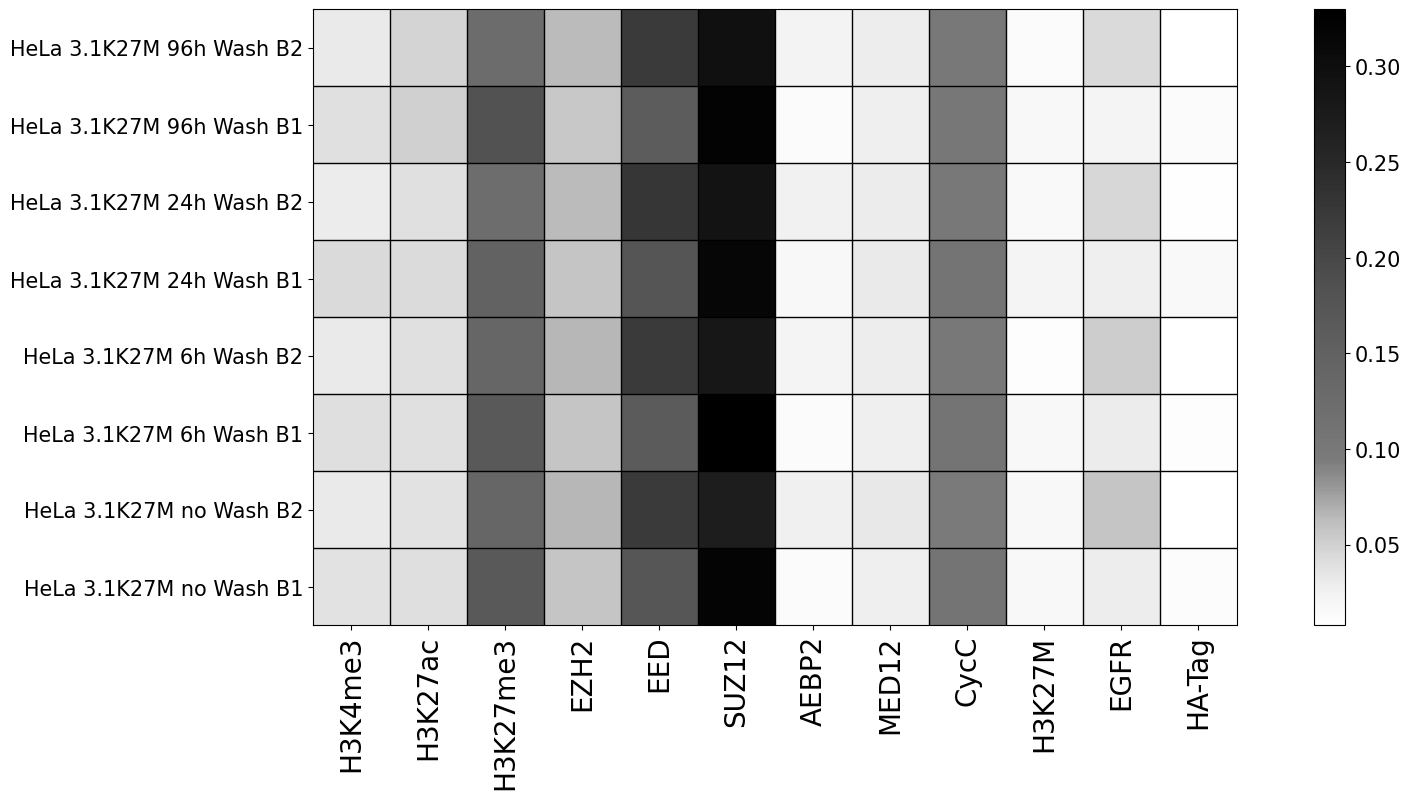

In [7]:
# Multiple plots together as one figure; Prod263
plot_data = (all_PQ_avg)[8:16]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, cmap = customized_cmap)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(y_labels[8:16], fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", va = "center",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1)
# fig.savefig("Supp_HeLa_31_PQ_depthnorm.svg", dpi = 1200)